<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Calc" data-toc-modified-id="Calc-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calc</a></span><ul class="toc-item"><li><span><a href="#SpecD" data-toc-modified-id="SpecD-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>SpecD</a></span></li><li><span><a href="#IndD" data-toc-modified-id="IndD-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>IndD</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* calculate patristic distance matrices for host tree

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/'

# host tree (one per speices; SpecD)
host_tree_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_SpecD.nwk'
# host tree (one per host; IndD)
host_tree_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_IndD.nwk'


# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)
library(ape)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘stringr’ was built under R version 3.4.3”

# Load

In [3]:
tree_SpecD = read.tree(host_tree_SpecD_file)
tree_SpecD


Phylogenetic tree with 128 tips and 127 internal nodes.

Tip labels:
	Sander_lucioperca, Esox_lucius, Salvelinus_fontinalis, Aspius_aspius, Leuciscus_idus, Blicca_bjoerkna, ...
Node labels:
	, @_22_@, @_8_@, @_7_@, @_20_@, @_17_@, ...

Rooted; includes branch lengths.

In [4]:
tree_IndD = read.tree(host_tree_IndD_file)
tree_IndD


Phylogenetic tree with 213 tips and 177 internal nodes.

Tip labels:
	X256.Zander, F302.Northern.Pike, X188.Brook.Trout, F300.Asp, X330.Ide, X327.Silver.Bream, ...
Node labels:
	, @_22_@, @_8_@, @_7_@, @_20_@, @_17_@, ...

Rooted; includes branch lengths.

# Calc

In [5]:
rescale_dist_mtx = function(m){
    m = m %>% as.matrix
    labs = m %>% colnames
    n_row = m %>% nrow
    n_col = m %>% ncol
    x = m %>% as.vector 
    x = scales::rescale(x) 
    m = matrix(x, nrow=n_row, ncol=n_col)
    colnames(m) = labs
    rownames(m) = labs
    m = m %>% as.dist
    return(m)
}

## SpecD

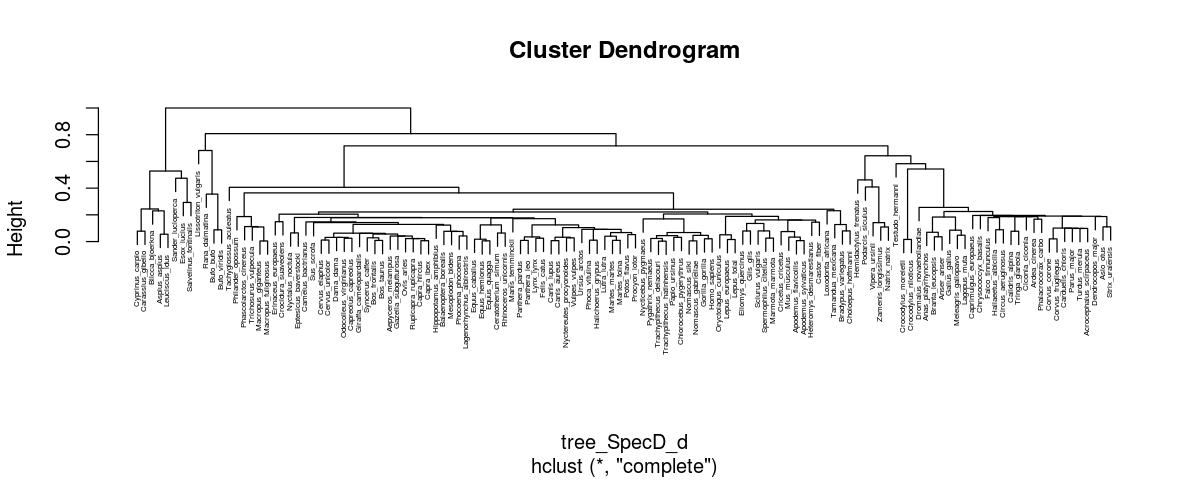

In [6]:
tree_SpecD_d = tree_SpecD %>% cophenetic %>% as.dist %>% rescale_dist_mtx 

options(repr.plot.width=10, repr.plot.height=4)
plot(hclust(tree_SpecD_d), cex=0.4)

In [7]:
# writing
out_file = paste0(tools::file_path_sans_ext(host_tree_SpecD_file), '_dist.RDS')
saveRDS(tree_SpecD_d, out_file)
cat('File written:', out_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_SpecD_dist.RDS 


## IndD

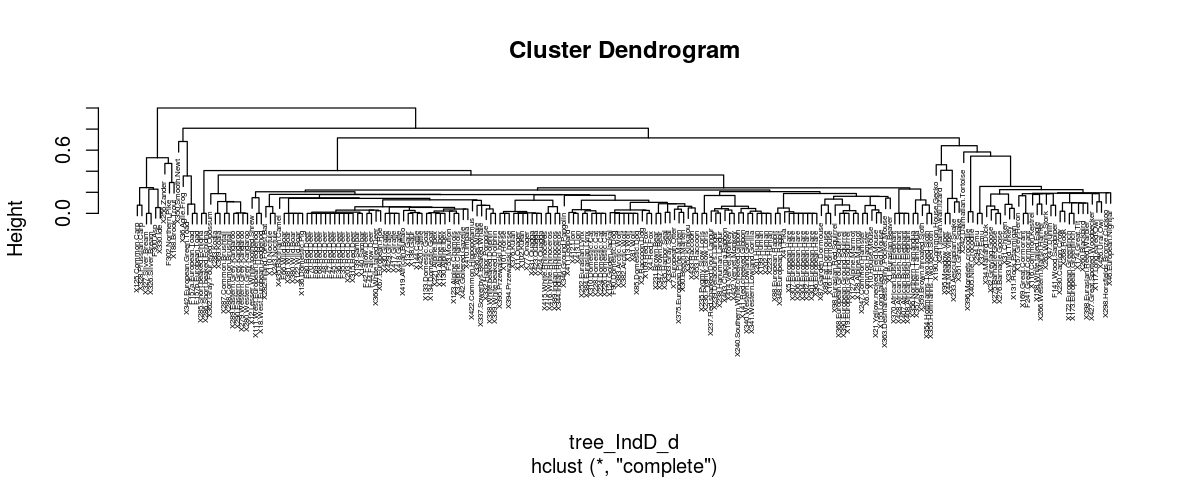

In [8]:
tree_IndD_d = tree_IndD %>% cophenetic %>% as.dist %>% rescale_dist_mtx 

options(repr.plot.width=10, repr.plot.height=4)
plot(hclust(tree_IndD_d), cex=0.4)

In [9]:
# writing
out_file = paste0(tools::file_path_sans_ext(host_tree_IndD_file), '_dist.RDS')
saveRDS(tree_IndD_d, out_file)
cat('File written:', out_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_IndD_dist.RDS 


# sessionInfo

In [10]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ape_5.1       stringr_1.2.0 ggplot2_2.2.1 tidyr_0.8.1   dplyr_0.7.4  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.14     bindr_0.1.1      magrittr_1.5     munsell_0.5.0   
 [5] uuid_0.1-2      